In [1]:
from sklearn import datasets

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 

In [4]:
digits = datasets.load_digits()

print(digits.keys())
print(digits.target)
print(digits.data)
print(digits.target_names)
# print(digits.images)
# print(digits.DESCR)

#看總共有幾個target，label值
print(len(np.unique(digits.target)))

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])
[0 1 2 ..., 8 9 8]
[[  0.   0.   5. ...,   0.   0.   0.]
 [  0.   0.   0. ...,  10.   0.   0.]
 [  0.   0.   0. ...,  16.   9.   0.]
 ..., 
 [  0.   0.   1. ...,   6.   0.   0.]
 [  0.   0.   2. ...,  12.   0.   0.]
 [  0.   0.  10. ...,  12.   1.   0.]]
[0 1 2 3 4 5 6 7 8 9]
10


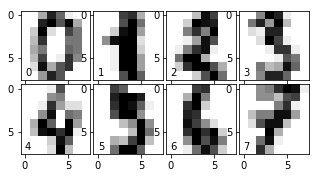

In [7]:
#開啟一個空白畫布(寬，高)
fig = plt.figure(figsize=(4, 2))
#調整畫布參數
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
for i in range(8):
    # 在2 x 4的格子中第i + 1個位置繪製子圖形，並且關掉座標軸刻度
    ax = fig.add_subplot(2,4,i+1)
    # 顯示圖形，色彩選擇灰階
    ax.imshow(digits.images[i],cmap = plt.cm.binary)
    # 在左下角標示目標值
    ax.text(0, 7, str(digits.target[i]))
plt.show()

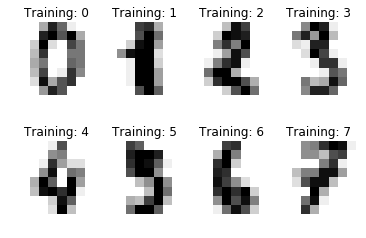

In [20]:
# 將特徵值和標籤裝成tuple放入一個list
images_and_labels = list(zip(digits.images, digits.target))
#看一下用zip函式的結果
# for i in zip(digits.images, digits.target):
#     print(i)
# list中的每個元素
for i, (image, label) in enumerate(images_and_labels[:8]):
    # 在i + 1的位置初始化子圖形
    plt.subplot(2, 4, i + 1).axis("off")
    # 關掉子圖形座標軸刻度
    #plt.axis('off')
    # 顯示圖形，色彩選擇灰階
    plt.imshow(image, cmap = plt.cm.binary)
    # 加入子圖形的標題
    plt.title('Training: ' + str(label))
    
# 顯示圖形
plt.show()

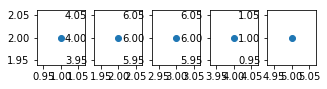

In [37]:
x = [1,2,3,4,5]
y = [2,4,6,6,1]

ax = list(zip(x,y))
fig = plt.figure(figsize=(5, 1))
for i,(x,y) in enumerate(ax):
    
    plt.subplot(1,5,i+1)
    plt.scatter(x, y)
plt.show()



In [26]:
from sklearn.decomposition import RandomizedPCA
from sklearn.decomposition import PCA

#Randomized PCA model，線性降維成兩個主成分
randomized_pca = RandomizedPCA(n_components=2)

# Fit and transform the data to the model
reduced_data_rpca = randomized_pca.fit_transform(digits.data)

# regular PCA model，降維成兩個主成分
pca = PCA(n_components=2)

# Fit and transform the data to the model
reduced_data_pca = pca.fit_transform(digits.data)

#看資料的訊息
print("Shape of reduced_data_pca:", reduced_data_pca.shape)
print("---")

print("RPCA:")
print(reduced_data_rpca)
print("---")
print("PCA:")
print(reduced_data_pca)

C:\Users\joshua.chen\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:52: DeprecationWarning: Class RandomizedPCA is deprecated; RandomizedPCA was deprecated in 0.18 and will be removed in 0.20. Use PCA(svd_solver='randomized') instead. The new implementation DOES NOT store whiten ``components_``. Apply transform to get them.
  warnings.warn(msg, category=DeprecationWarning)


Shape of reduced_data_pca: (1797, 2)
---
RPCA:
[[ -1.23276272  21.26724337]
 [  7.93843631 -20.76386525]
 [  7.02973446  -9.97754694]
 ..., 
 [ 10.7865159   -6.96065481]
 [ -4.91390365  12.44935463]
 [ -0.36549499   6.37269482]]
---
PCA:
[[ -1.2594668   21.27488587]
 [  7.95761235 -20.76870484]
 [  6.99192277  -9.955986  ]
 ..., 
 [ 10.80128244  -6.96024419]
 [ -4.87209925  12.42394654]
 [ -0.34439149   6.36556069]]


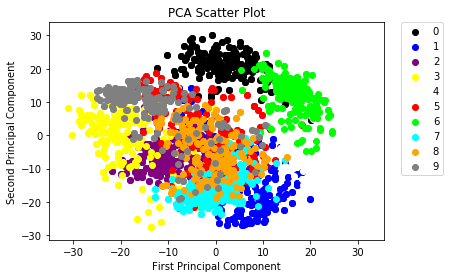

In [39]:
colors = ['black', 'blue', 'purple', 'yellow', 'white', 'red', 'lime', 'cyan', 'orange', 'gray']
for i in range(len(colors)):
    x = reduced_data_rpca[:, 0][digits.target == i]
    y = reduced_data_rpca[:, 1][digits.target == i]
    plt.scatter(x, y, c=colors[i])
plt.legend(digits.target_names, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title("PCA Scatter Plot")
plt.show()

In [42]:
from sklearn.preprocessing import scale

#把資料標準化
data = scale(digits.data)
#cross-validation 要被移除了
from sklearn.cross_validation import train_test_split

#把資料切分成3:1的訓練資料和測試資料，有設置random_state代表每次劃分資料群都是一樣的
X_train, X_test, y_train, y_test, images_train, images_test = train_test_split(data, digits.target, digits.images, test_size=0.25, random_state=42)

C:\Users\joshua.chen\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [140]:
# Number of training features
n_samples, n_features = X_train.shape

# Print out `n_samples`
print(n_samples)

# Print out `n_features`
print(n_features)

# Number of Training labels
print(type(y_train))
n_digits = len(np.unique(y_train))
print(n_digits)
# Inspect `y_train`
print(len(y_train))
# print(images_train)
# print(images_test)

1347
64
<class 'numpy.ndarray'>
10
1347


In [48]:
# Import the `cluster` module
from sklearn import cluster

# Create the KMeans model，init預設是使用kmeans演算法，這邊為已知群集
#所以n_clusters=10，一般狀況是用交叉驗證方式找出，誤差平方和最小的群集數

clf = cluster.KMeans(init='k-means++', n_clusters=10, random_state=42)

# Fit the training data `X_train`to the model
#因為這邊是分群演算法，一開始是沒有標籤的，所以生成model只需要特徵值
clf.fit(X_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=10, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=42, tol=0.0001, verbose=0)

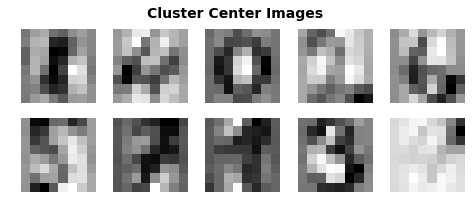

In [58]:
import matplotlib.pyplot as plt

# 設定圖形的大小
fig = plt.figure(figsize=(8, 3))

# 圖形標題
fig.suptitle('Cluster Center Images', fontsize=14, fontweight='bold')

# 對所有的目標值（0 - 9）
for i in range(10):
    # 在 2x5 的網格上繪製子圖形
    ax = fig.add_subplot(2, 5, i + 1)
    # 顯示圖片
    ax.imshow(clf.cluster_centers_[i].reshape((8, 8)), cmap=plt.cm.binary)
    # 將座標軸刻度關掉
    plt.axis('off')

# 顯示圖形
plt.show()

In [59]:
# Predict the labels for `X_test`
y_pred=clf.predict(X_test)

# Print out the first 100 instances of `y_pred`
print(y_pred[:100])

# Print out the first 100 instances of `y_test`
print(y_test[:100])

# Study the shape of the cluster centers
clf.cluster_centers_.shape

[4 8 8 9 3 3 5 8 5 3 0 7 1 2 1 3 8 6 8 8 1 5 8 6 5 4 8 5 4 8 1 8 3 1 1 4 8
 1 6 4 4 8 0 8 4 7 8 2 4 5 5 0 8 5 4 2 8 2 2 7 2 1 5 3 1 5 6 2 6 8 8 8 8 6
 6 2 1 5 8 8 8 2 3 8 8 2 4 1 1 8 0 3 7 8 8 3 8 2 1 1]
[6 9 3 7 2 1 5 2 5 2 1 9 4 0 4 2 3 7 8 8 4 3 9 7 5 6 3 5 6 3 4 9 1 4 4 6 9
 4 7 6 6 9 1 3 6 1 3 0 6 5 5 1 9 5 6 0 9 0 0 1 0 4 5 2 4 5 7 0 7 5 9 5 5 4
 7 0 4 5 5 9 9 0 2 3 8 0 6 4 4 9 1 2 8 3 5 2 9 0 4 4]


(10, 64)

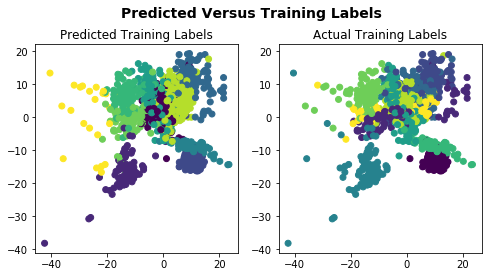

In [63]:
from sklearn.manifold import Isomap
# 使用 Isomap 對 `X_train` 資料降維(非線性降維)
X_iso = Isomap(n_neighbors=10).fit_transform(X_train)

# 使用 K-Means 演算法
clusters = clf.fit_predict(X_train)

# 在 1x2 的網格上繪製子圖形
fig, ax = plt.subplots(1, 2, figsize=(8, 4))

# 調整圖形的外觀
fig.suptitle('Predicted Versus Training Labels', fontsize=14, fontweight='bold')
fig.subplots_adjust(top=0.85)


# 加入散佈圖 
ax[0].scatter
ax[0].scatter(X_iso[:, 0], X_iso[:, 1], c=clusters)
ax[0].set_title('Predicted Training Labels')
ax[1].scatter(X_iso[:, 0], X_iso[:, 1], c=y_train)
ax[1].set_title('Actual Training Labels')

# 顯示圖形
plt.show()

In [65]:
# Import `metrics` from `sklearn`
from sklearn import metrics

# Print out the confusion matrix with `confusion_matrix()，斜線左上到右下代表預測正確，預測是5實際也是5的有41個
print(metrics.confusion_matrix(y_test, y_pred))
#其他可評估結果的指標，silhouette太低表示，許多值都在分群的邊界，效果不太好
from sklearn.metrics import homogeneity_score, completeness_score, v_measure_score, adjusted_rand_score, adjusted_mutual_info_score, silhouette_score
print('% 9s' % 'inertia    homo   compl  v-meas     ARI AMI  silhouette')
print('%i   %.3f   %.3f   %.3f   %.3f   %.3f    %.3f'
          %(clf.inertia_,
      homogeneity_score(y_test, y_pred),
      completeness_score(y_test, y_pred),
      v_measure_score(y_test, y_pred),
      adjusted_rand_score(y_test, y_pred),
      adjusted_mutual_info_score(y_test, y_pred),
      silhouette_score(X_test, y_pred, metric='euclidean')))

[[ 0  0 43  0  0  0  0  0  0  0]
 [20  0  0  7  0  0  0 10  0  0]
 [ 5  0  0 31  0  0  0  1  1  0]
 [ 1  0  0  1  0  1  4  0 39  0]
 [ 1 50  0  0  0  0  1  2  0  1]
 [ 1  0  0  0  1 41  0  0 16  0]
 [ 0  0  1  0 44  0  0  0  0  0]
 [ 0  0  0  0  0  1 34  1  0  5]
 [21  0  0  0  0  3  1  2 11  0]
 [ 0  0  0  0  0  2  3  3 40  0]]
inertia    homo   compl  v-meas     ARI AMI  silhouette
54276   0.688   0.733   0.710   0.567   0.674    0.146


In [66]:
# Import `train_test_split`
from sklearn.cross_validation import train_test_split

# Split the data into training and test sets 
X_train, X_test, y_train, y_test, images_train, images_test = train_test_split(digits.data, digits.target, digits.images, test_size=0.25, random_state=42)

# Import the `svm` model
from sklearn import svm

# Create the SVC model 
#可用交叉驗證或網格搜索調整gamma參數
svc_model = svm.SVC(gamma=0.001, C=100., kernel='linear')

# Fit the data to the SVC model
svc_model.fit(X_train, y_train)

SVC(C=100.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.001, kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [67]:
# Split the `digits` data into two equal sets
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.5, random_state=0)

# Import GridSearchCV
from sklearn.grid_search import GridSearchCV
#=================用網格搜索的方式來找尋最佳的參數=====================
# Set the parameter candidates
parameter_candidates = [
  {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
  {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']},
]

# Create a classifier with the parameter candidates
clf = GridSearchCV(estimator=svm.SVC(), param_grid=parameter_candidates, n_jobs=-1)

# Train the classifier on training data
clf.fit(X_train, y_train)

# Print out the results 
print('Best score for training data:', clf.best_score_)
print('Best `C`:',clf.best_estimator_.C)
print('Best kernel:',clf.best_estimator_.kernel)
print('Best `gamma`:',clf.best_estimator_.gamma)

C:\Users\joshua.chen\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


Best score for training data: 0.9844097995545658
Best `C`: 10
Best kernel: rbf
Best `gamma`: 0.001


In [75]:
#手動調整參數驗證準確率====>達到99%準確率...
clf.score(X_test, y_test)  

# Train and score a new classifier with the grid search parameters
svm.SVC(C=10, kernel='rbf', gamma=0.001).fit(X_train, y_train).score(X_test, y_test)

0.99110122358175756

[[[  0.   0.   0. ...,   0.   0.   0.]
  [  0.   0.   4. ...,   0.   0.   0.]
  [  0.   0.  12. ...,   0.   0.   0.]
  ..., 
  [  0.   0.  14. ...,   0.  12.   0.]
  [  0.   0.   8. ...,   5.  16.   2.]
  [  0.   0.   0. ...,  14.   5.   0.]]

 [[  0.   0.  11. ...,   0.   0.   0.]
  [  0.   6.  16. ...,   9.   0.   0.]
  [  0.   7.  16. ...,  16.   0.   0.]
  ..., 
  [  0.   0.   0. ...,  16.   5.   0.]
  [  0.   0.   3. ...,  11.   0.   0.]
  [  0.   0.  13. ...,   1.   0.   0.]]

 [[  0.   0.   8. ...,   4.   0.   0.]
  [  0.   5.  14. ...,   7.   0.   0.]
  [  0.   0.   0. ...,   3.   0.   0.]
  ..., 
  [  0.   0.   0. ...,  13.   5.   0.]
  [  0.   0.  12. ...,  12.   7.   0.]
  [  0.   0.  13. ...,   8.   0.   0.]]

 ..., 
 [[  0.   1.  13. ...,   5.   0.   0.]
  [  0.   4.  16. ...,  12.   0.   0.]
  [  0.   3.  12. ...,  10.   0.   0.]
  ..., 
  [  0.   0.   1. ...,   0.   0.   0.]
  [  0.   0.   9. ...,  16.   7.   0.]
  [  0.   1.  16. ...,  12.   5.   0.]]

 [[  0.   0.   0.

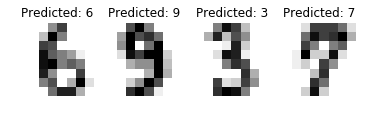

In [82]:
X_train, X_test, y_train, y_test, images_train, images_test = train_test_split(digits.data, digits.target, digits.images, test_size=0.25, random_state=42)
from sklearn import svm
svc_model = svm.SVC(gamma=0.001, C=100., kernel='linear')
svc_model.fit(X_train, y_train)
# 將預測結果指派給 `predicted`
predicted = svc_model.predict(X_test)
print(images_test)
# 將 `images_test` 與 `predicted` 存入 `images_and_predictions`
images_and_predictions = list(zip(images_test, predicted))

# 繪製前四個元素
for index, (image, prediction) in enumerate(images_and_predictions[:4]):
    # 在 1x4 的網格上繪製子圖形
    plt.subplot(1, 4, index + 1)
    # 關掉座標軸的刻度
    plt.axis('off')
    # 色彩用灰階
    plt.imshow(image, cmap=plt.cm.binary)
    # 加入標題
    plt.title('Predicted: ' + str(prediction))

# 顯示圖形
plt.show()

In [83]:
#可查看模型效果
# Print the classification report of `y_test` and `predicted`
print(metrics.classification_report(y_test,predicted))

# Print the confusion matrix of `y_test` and `predicted`
print(metrics.confusion_matrix(y_test,predicted))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        43
          1       0.97      1.00      0.99        37
          2       0.97      1.00      0.99        38
          3       0.98      0.93      0.96        46
          4       1.00      0.98      0.99        55
          5       0.97      1.00      0.98        59
          6       1.00      1.00      1.00        45
          7       0.98      0.98      0.98        41
          8       1.00      0.97      0.99        38
          9       0.96      0.96      0.96        48

avg / total       0.98      0.98      0.98       450

[[43  0  0  0  0  0  0  0  0  0]
 [ 0 37  0  0  0  0  0  0  0  0]
 [ 0  0 38  0  0  0  0  0  0  0]
 [ 0  0  1 43  0  1  0  0  0  1]
 [ 0  1  0  0 54  0  0  0  0  0]
 [ 0  0  0  0  0 59  0  0  0  0]
 [ 0  0  0  0  0  0 45  0  0  0]
 [ 0  0  0  0  0  0  0 40  0  1]
 [ 0  0  0  0  0  1  0  0 37  0]
 [ 0  0  0  1  0  0  0  1  0 46]]


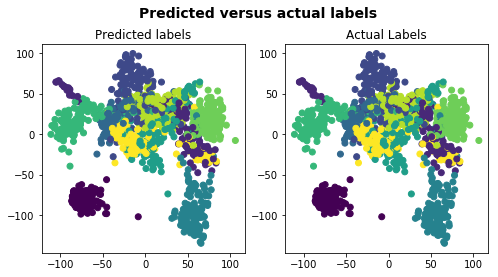

In [84]:
# 對 `digits` 資料降維
X_iso = Isomap(n_neighbors=10).fit_transform(X_train)

# 使用 SVC 演算法
predicted = svc_model.predict(X_train)

# 在 1x2 的網格上繪製子圖形
fig, ax = plt.subplots(1, 2, figsize=(8, 4))

# 調整外觀
fig.subplots_adjust(top=0.85)

# 繪製散佈圖 
ax[0].scatter(X_iso[:, 0], X_iso[:, 1], c=predicted)
ax[0].set_title('Predicted labels')
ax[1].scatter(X_iso[:, 0], X_iso[:, 1], c=y_train)
ax[1].set_title('Actual Labels')

# 加入標題
fig.suptitle('Predicted versus actual labels', fontsize=14, fontweight='bold')

# 顯示圖形
plt.show()

# stumbleupon dataset 分析哪寫網站是暫時性的或是長期的

In [4]:
import pandas as pd
#查看training資料
train_data = pd.read_csv("../MNIST_data/web_train.tsv",delimiter="\t")

print(train_data.keys())
# print(train_data)
print(train_data.shape)

Index(['url', 'urlid', 'boilerplate', 'alchemy_category',
       'alchemy_category_score', 'avglinksize', 'commonlinkratio_1',
       'commonlinkratio_2', 'commonlinkratio_3', 'commonlinkratio_4',
       'compression_ratio', 'embed_ratio', 'framebased', 'frameTagRatio',
       'hasDomainLink', 'html_ratio', 'image_ratio', 'is_news',
       'lengthyLinkDomain', 'linkwordscore', 'news_front_page',
       'non_markup_alphanum_characters', 'numberOfLinks', 'numwords_in_url',
       'parametrizedLinkRatio', 'spelling_errors_ratio', 'label'],
      dtype='object')
(7395, 27)


In [5]:
test_data = pd.read_csv("../MNIST_data/web_test.tsv",delimiter="\t")
print(test_data.keys())

Index(['url', 'urlid', 'boilerplate', 'alchemy_category',
       'alchemy_category_score', 'avglinksize', 'commonlinkratio_1',
       'commonlinkratio_2', 'commonlinkratio_3', 'commonlinkratio_4',
       'compression_ratio', 'embed_ratio', 'framebased', 'frameTagRatio',
       'hasDomainLink', 'html_ratio', 'image_ratio', 'is_news',
       'lengthyLinkDomain', 'linkwordscore', 'news_front_page',
       'non_markup_alphanum_characters', 'numberOfLinks', 'numwords_in_url',
       'parametrizedLinkRatio', 'spelling_errors_ratio'],
      dtype='object')


In [6]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 

C:\Users\joshua.chen\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:52: DeprecationWarning: Class RandomizedPCA is deprecated; RandomizedPCA was deprecated in 0.18 and will be removed in 0.20. Use PCA(svd_solver='randomized') instead. The new implementation DOES NOT store whiten ``components_``. Apply transform to get them.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\joshua.chen\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix


                                                    url  urlid  \
0     http://www.bloomberg.com/news/2010-12-23/ibm-p...   4042   
1     http://www.popsci.com/technology/article/2012-...   8471   
2     http://www.menshealth.com/health/flu-fighting-...   1164   
3     http://www.dumblittleman.com/2007/12/10-foolpr...   6684   
4     http://bleacherreport.com/articles/1205138-the...   9006   
5     http://www.conveniencemedical.com/genital-herp...   7018   
6     http://gofashionlane.blogspot.tw/2012/06/ameri...   8685   
7     http://www.insidershealth.com/article/racing_f...   3402   
8     http://www.valetmag.com/the-handbook/features/...    477   
9     http://www.howsweeteats.com/2010/03/24/cookies...   6731   
10                              http://www.reuters.com/   2293   
11    http://www.midwestsportsfans.com/2010/12/photo...   3651   
12    http://www.ivillage.com/our-dirty-mouths/4-b-1...   1917   
13    http://www.thedailygreen.com/print-this/health...   1063   
14    http

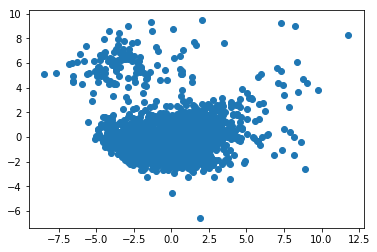

In [28]:

from sklearn.decomposition import RandomizedPCA
from sklearn.decomposition import PCA
from pandas import DataFrame
# def to_number(s):
#     try:
#         s1 = float(s)
#         return s1
#     except ValueError:
#         return s
r_pca = RandomizedPCA(n_components=2)


#可使用apply方法來對整個column或row作操作

# def isQuestion(x):
#     for i in x:
#         if i == "?":
#             i=np.nan
print(train_data)
# train_data 4到25才是需要的特徵值，dataframe
features_train_data = train_data.iloc[:,4:]



# features_train_data.apply(isQuestion,axis=0)
filter_features_train_data = features_train_data.replace("?",np.nan).dropna()
# print(filter_features_train_data)
#切分成特徵值和label
features= filter_features_train_data.ix[:,:-1]
label = filter_features_train_data.ix[:,'label']

from sklearn.preprocessing import scale

#把資料標準化
std_filter_features_train_data = scale(filter_features_train_data)
#ndarray
reduced_filter_features_train_data = r_pca.fit_transform(std_filter_features_train_data)

print(reduced_filter_features_train_data)
reduced_filter_features_train_data_df = pd.DataFrame(reduced_filter_features_train_data)
# for x,y in reduced_filter_features_train_data:
#     plt.scatter(x, y)
print(reduced_filter_features_train_data_df)
# plt.legend(reduced_filter_features_train_data)
# plt.xlabel('First Principal Component')
# plt.ylabel('Second Principal Component')
plt.scatter(reduced_filter_features_train_data_df[0],reduced_filter_features_train_data_df[1])
plt.show()

#以第一項種類來做分組
# group_filter_features_train_data = filter_features_train_data.iloc[:,0:].groupby('alchemy_category')
# group_filter_features_train_data.agg()

    


# reduced_train_data = r_pca.fit_transform(to_number(train_data.iloc[:8,4:-1]))
# print(reduced_train_data)

In [24]:

from sklearn import svm
svc_model = svm.SVC(gamma=0.001, C=100., kernel='linear')
svc_model.fit(features,label)
features_test_data = test_data.iloc[:,4:]
filter_features_test_data = features_test_data.replace("?",np.nan).dropna()
#預測結果，但此結果必須上傳kaggle才可知道正確率
pre = svc_model.predict(filter_features_test_data)
print(pre)

[1 0 0 ..., 1 1 1]


# 線性迴歸，也屬於監督式學習

In [2]:
from sklearn import datasets
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

In [38]:
#溫度和飲料銷售量的關係預測
temperature = np.random.randint(16,35,10)[np.newaxis]   #在numpy裡前面的部分是1D array
drink_sales = np.random.randint(60,90,10)[np.newaxis]   #但1D array沒辦法transpose，所以加[np.newaxis]變成2D array
lr = LinearRegression()
print(temperature)
print(temperature.T)
print(drink_sales.T)
#LinearRegression的fit方法只適用[samples,features]的格式
lr.fit(temperature.T,drink_sales.T)
print(lr.coef_)
print(lr.intercept_)

[[18 28 17 17 28 22 23 25 26 26]]
[[18]
 [28]
 [17]
 [17]
 [28]
 [22]
 [23]
 [25]
 [26]
 [26]]
[[89]
 [83]
 [88]
 [74]
 [79]
 [77]
 [89]
 [63]
 [75]
 [61]]
[[-0.88235294]]
[ 98.09411765]


[[ 80.44705882]
 [ 71.62352941]
 [ 75.15294118]]
-65.6452270314


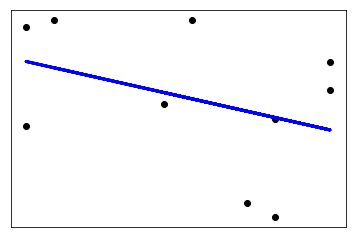

In [39]:
print(lr.predict(np.array([20,30,26])[np.newaxis].T))
print(lr.score(np.array([20,30,26])[np.newaxis].T,np.array([71.07,72.78,72.09])[np.newaxis].T))
import matplotlib.pyplot as plt

plt.scatter(temperature, drink_sales, color='black')

plt.plot(temperature.T, lr.predict(temperature.T), color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())
plt.show()

# 複迴歸

In [2]:
import numpy as np
from sklearn.linear_model import LinearRegression
#兩個自變數
X = np.array([
    [10, 80], [8, 0], [8, 200], [5, 200], [7, 300], [8, 230], [7, 40], [9, 0], [6, 330], [9, 180]
])
y = np.array([469, 366, 371, 208, 246, 297, 363, 436, 198, 364])

lr = LinearRegression()
lr.fit(X, y)

# 印出係數
print(lr.coef_)

# 印出截距
print(lr.intercept_ )

[ 41.51347826  -0.34088269]
65.3239163889


In [7]:
predicted = lr.predict(np.array([[12,50]]))
print(predicted)
mse = np.mean((lr.predict(X) - y) ** 2)
r_squared = lr.score(X, y)
print(mse)
print(r_squared)
print(X.shape,y.shape)
from sklearn.feature_selection import f_regression
#array1 is F-value array2 is p-value
print(f_regression(X,y))

[ 546.44152118]
417.300611999
0.945235852682
(10, 2) (10,)
(array([ 31.28310584,  12.03775324]), array([ 0.00051435,  0.00844837]))


# logistic迴歸模型

In [8]:
import pandas as pd
import numpy as np
from sklearn import preprocessing, linear_model

url = "https://storage.googleapis.com/2017_ithome_ironman/data/kaggle_titanic_train.csv"
titanic_train = pd.read_csv(url)


In [12]:
titanic_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,28.0,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [14]:

print(type(titanic_train))
#compute median without nan
age_median = np.nanmedian(titanic_train["Age"])
print(age_median)
#where(condition[,x,y]),if condition is true return x else y 
#把age 欄位是null改成age_median
new_Age = np.where(titanic_train["Age"].isnull(), age_median, titanic_train["Age"])
titanic_train["Age"] = new_Age




<class 'pandas.core.frame.DataFrame'>
28.0


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,28.0,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [19]:
# 創造 dummy variables
#把種類轉換成數字來區分
label_encoder = preprocessing.LabelEncoder()
encoded_Sex = label_encoder.fit_transform(titanic_train["Sex"])
print(encoded_Sex)

# 建立 train_X
train_X = pd.DataFrame([titanic_train["Pclass"],
                        encoded_Sex,
                        titanic_train["Age"]]).T
train_X



[1 0 0 0 1 1 1 1 0 0 0 0 1 1 0 0 1 1 0 0 1 1 0 1 0 0 1 1 0 1 1 0 0 1 1 1 1
 1 0 0 0 0 1 0 0 1 1 0 1 0 1 1 0 0 1 1 0 1 0 1 1 0 1 1 1 1 0 1 0 1 1 0 1 1
 1 1 1 1 1 0 1 1 0 1 0 0 1 1 0 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 0 1 1 0 1
 0 1 0 0 1 1 1 1 0 1 1 1 0 1 1 1 1 0 1 1 1 0 0 1 1 0 1 1 1 0 0 0 1 1 1 1 0
 1 1 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1 1 0 0 1 1 1 1 0 1 1 1 1 0 1 1 0 1 1 1 0
 1 0 1 1 1 0 1 0 1 0 0 1 1 0 0 1 1 1 1 1 0 1 1 0 1 1 0 1 1 1 0 0 1 0 1 1 1
 1 1 1 1 1 1 1 0 0 1 1 0 1 0 1 0 1 1 0 0 1 1 1 1 0 0 1 1 1 0 1 1 0 0 0 0 0
 0 1 1 1 1 0 1 1 1 0 0 1 1 0 1 0 0 0 1 1 0 1 1 1 1 1 1 1 1 1 0 0 0 1 0 1 1
 1 0 1 0 0 1 1 0 1 1 0 0 1 0 0 0 0 1 1 0 0 1 0 0 1 1 0 0 1 0 1 0 0 0 0 1 1
 1 0 1 1 0 1 1 1 0 1 1 1 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0 1 1 0 1 1 1 0 0 0 0
 1 1 1 1 0 0 0 1 1 1 0 0 1 0 1 1 1 0 1 0 1 1 1 0 0 1 0 1 1 0 1 1 0 1 0 1 1
 1 1 0 1 1 0 1 1 0 0 0 1 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 0 0 0 1 1 0 1 1 0
 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 0 1 1 0 0 0 1 1 1 1 0 1
 1 1 0 1 0 0 1 1 1 1 1 1 

,Pclass,Unnamed 0,Age
0,3.0,1.0,22.0
1,1.0,0.0,38.0
2,3.0,0.0,26.0
3,1.0,0.0,35.0
4,3.0,1.0,35.0
5,3.0,1.0,28.0
6,1.0,1.0,54.0
7,3.0,1.0,2.0
8,3.0,0.0,27.0
9,2.0,0.0,14.0


In [21]:
#create logistic model
logistic_regr = linear_model.LogisticRegression()
logistic_regr.fit(train_X, titanic_train["Survived"])

# 印出係數
print(logistic_regr.coef_)

# 印出截距
print(logistic_regr.intercept_ )
from sklearn.feature_selection import f_regression
#p-value
print(f_regression(train_X, titanic_train["Survived"])[1])
survived_predictions = logistic_regr.predict(train_X)
#二元分類用準確率判斷
accuracy = logistic_regr.score(train_X, titanic_train["Survived"])
print(survived_predictions)
print(accuracy)

[[-0.98136537 -2.40629309 -0.023991  ]]
[ 3.88051905]
[  2.53704739e-25   1.40606613e-69   5.27606885e-02]
[0 1 1 1 0 0 0 0 1 1 1 1 0 0 1 1 0 0 1 1 0 0 1 0 1 1 0 1 1 0 0 1 1 0 0 0 0
 0 1 1 0 1 0 1 1 0 0 1 0 1 0 0 1 1 0 0 1 0 1 0 0 1 0 0 0 0 1 0 1 0 0 1 0 0
 0 0 0 0 0 1 0 0 1 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 1 0
 1 0 1 1 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 1 1 1 0 0 0 0 1
 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 1
 0 1 0 0 0 1 0 1 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 1 1 0 1 0 0 0
 0 0 0 0 0 0 0 1 1 0 0 1 0 1 0 1 0 0 1 1 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 1 1
 1 0 0 0 0 1 0 0 0 1 1 0 0 1 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 1 0 1 0 0
 0 1 0 1 1 0 0 1 0 1 1 1 0 1 1 1 1 0 0 1 1 0 1 1 0 0 1 1 0 1 0 1 1 1 1 0 0
 0 1 0 0 1 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 1 1 1 1
 0 0 0 0 1 1 1 0 0 0 1 1 0 1 0 0 0 1 0 1 0 0 0 1 1 0 1 0 0 1 0 0 1 0 1 0 0
 0 0 1 0 0 1 0 0 1 1 1 0 1 0 0 0 1 0 0 1 1 0 0 0 1 1 0 0 1 1 1 0 0 1

In [33]:
from sklearn.datasets import load_iris
from sklearn import tree
from sklearn.cross_validation import train_test_split

# 讀入鳶尾花資料
iris = load_iris()
iris_X = iris.data
iris_y = iris.target
print(iris_X,iris_y)
train_X,test_X,train_y,test_y = train_test_split(iris_X,iris_y,test_size = 0.3)

clf = tree.DecisionTreeClassifier()
iris_clf = clf.fit(train_X, train_y)
test_y_predicted = iris_clf.predict(test_X)
print(test_y_predicted,"\n",test_y)
from sklearn import metrics
print(iris_clf.score(test_X,test_y))
print(metrics.accuracy_score(test_y,test_y_predicted))

[[ 5.1  3.5  1.4  0.2]
 [ 4.9  3.   1.4  0.2]
 [ 4.7  3.2  1.3  0.2]
 [ 4.6  3.1  1.5  0.2]
 [ 5.   3.6  1.4  0.2]
 [ 5.4  3.9  1.7  0.4]
 [ 4.6  3.4  1.4  0.3]
 [ 5.   3.4  1.5  0.2]
 [ 4.4  2.9  1.4  0.2]
 [ 4.9  3.1  1.5  0.1]
 [ 5.4  3.7  1.5  0.2]
 [ 4.8  3.4  1.6  0.2]
 [ 4.8  3.   1.4  0.1]
 [ 4.3  3.   1.1  0.1]
 [ 5.8  4.   1.2  0.2]
 [ 5.7  4.4  1.5  0.4]
 [ 5.4  3.9  1.3  0.4]
 [ 5.1  3.5  1.4  0.3]
 [ 5.7  3.8  1.7  0.3]
 [ 5.1  3.8  1.5  0.3]
 [ 5.4  3.4  1.7  0.2]
 [ 5.1  3.7  1.5  0.4]
 [ 4.6  3.6  1.   0.2]
 [ 5.1  3.3  1.7  0.5]
 [ 4.8  3.4  1.9  0.2]
 [ 5.   3.   1.6  0.2]
 [ 5.   3.4  1.6  0.4]
 [ 5.2  3.5  1.5  0.2]
 [ 5.2  3.4  1.4  0.2]
 [ 4.7  3.2  1.6  0.2]
 [ 4.8  3.1  1.6  0.2]
 [ 5.4  3.4  1.5  0.4]
 [ 5.2  4.1  1.5  0.1]
 [ 5.5  4.2  1.4  0.2]
 [ 4.9  3.1  1.5  0.1]
 [ 5.   3.2  1.2  0.2]
 [ 5.5  3.5  1.3  0.2]
 [ 4.9  3.1  1.5  0.1]
 [ 4.4  3.   1.3  0.2]
 [ 5.1  3.4  1.5  0.2]
 [ 5.   3.5  1.3  0.3]
 [ 4.5  2.3  1.3  0.3]
 [ 4.4  3.2  1.3  0.2]
 [ 5.   3.5

# KNN分類

In [36]:
from sklearn.datasets import load_iris
from sklearn import neighbors
from sklearn.cross_validation import train_test_split
from sklearn import metrics

iris = load_iris()
iris_X = iris.data
iris_y = iris.target

train_X,test_X,train_y,test_y = train_test_split(iris_X,iris_y,test_size = 0.3)

In [39]:
#必須將類別變數變為數值變數，並且作標準化，避免單位不同的問題
clf = neighbors.KNeighborsClassifier()
iris_clf = clf.fit(train_X, train_y)

# 預測
test_y_predicted = iris_clf.predict(test_X)
print(test_y_predicted)

# 標準答案
print(test_y)
iris_clf.score(test_X,test_y)

[2 1 1 0 0 2 2 2 1 1 2 1 2 2 1 1 0 0 2 2 0 2 1 2 2 2 0 2 1 1 1 0 0 1 1 1 2
 2 0 1 2 2 2 0 0]
[2 1 1 0 0 2 2 1 1 1 2 1 2 2 1 1 0 0 2 1 0 2 1 2 2 2 0 2 1 1 1 0 0 1 1 1 2
 2 0 1 2 2 1 0 0]


0.93333333333333335

In [21]:
nums = [1,4,3,2]
nums.sort()
print(nums)
size = len(nums)
count = 0
if size%2 == 0 and max(nums)<=10000 and min(nums)>0:
    for i in range(int(size/2)):
        m = min(nums)
        nums.remove(m)
        n = min(nums)
        nums.remove(n)
        count+=m
    print(count)    
else: 
    print("it can't be pairs!")

[1, 2, 3, 4]
4
